In [ ]:
# Do autoreload magic
%load_ext autoreload
%autoreload 2

# Change the main path to the parent of this folder
import sys
import os
os.chdir('/mnt/fs6/zwang71/BehaviorVideo/')
import ae2embed
import matplotlib.pyplot as plt
import numpy as np
import torch
import pickle

In [2]:
demo = ae2embed.AE2Embed()

In [3]:
demo.load_model(sess='SC026_080519')

521-AeLd-SC026_080519--g0-side-node08-embed16-stim_both-lr5.0e-04-mu_l25.0e-03-2021-08-27


In [4]:
print(demo.configs['saved_model']) # model is saved here and will be loaded

/mnt/fs6/zwang71/BehaviorVideo/log/train_log/SC/521-AeLd-SC026_080519--g0-side-node08-embed16-stim_both-lr5.0e-04-mu_l25.0e-03-2021-08-27/checkpoints/iter-25000-rt-train[9.580e-04__8.060e-03__0.000e+00__0.000e+00]-val[8.737e-04__7.186e-03__0.000e+00__0.000e+00]-521-AeLd-SC026_080519--g0-side-node08-embed16-stim_both-lr5.0e-04-mu_l25.0e-03-2021-08-27.pt


In [5]:
demo.load_model(sess='SC065_050621')

629-AeLd-SC065_050621--g8-side-node12-embed16-stim_both-lr5.0e-04-mu_l25.0e-03-2021-09-18


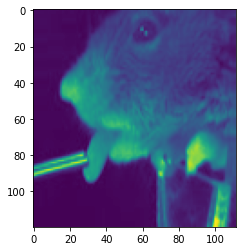

In [6]:
demo.load_image(image_path = '/data5/zwang71/MiceBehavior/data/SC/frames/side/SC065/20210506/SC-SC065-20210506-19/SC-SC065-20210506-19-side-01094.jpg')
plt.imshow(demo.model_input)

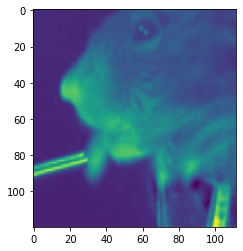

In [7]:
demo.inference()
plt.imshow(demo.x_out)

In [8]:
print(demo.mu) # the embedding vector

[-0.0067459   0.02192732 -0.03101525  0.04035011 -0.06185501 -0.02017587
 -0.05324446 -0.05590971 -0.04907797  0.01452272  0.03073453  0.0794278
  0.01497558 -0.03377071 -0.03077734 -0.02044039]


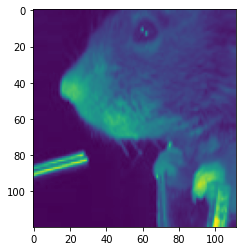

In [9]:
# see another example
demo.load_image(image_path = '/data5/zwang71/MiceBehavior/data/SC/frames/side/SC065/20210506/SC-SC065-20210506-19/SC-SC065-20210506-19-side-00100.jpg')
plt.imshow(demo.model_input)

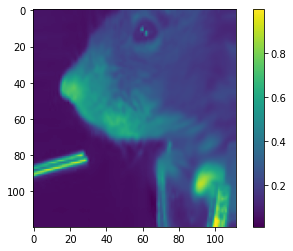

In [10]:
demo.inference()
plt.imshow(demo.x_out)
plt.colorbar()

In [11]:
print(demo.mu) # the embedding vector

[ 0.01479203  0.01720445  0.02441794 -0.01777621  0.0252235   0.03375017
  0.00329629  0.01931114 -0.01452558  0.00297966 -0.00196621 -0.00209185
  0.00945325 -0.00210063  0.007395   -0.02747882]


## Balint doing stuff

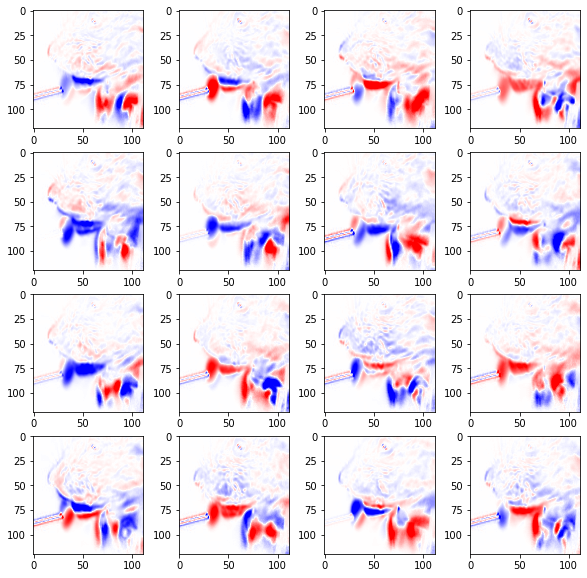

In [14]:
plt.subplots(4,4, figsize=(10,10))
for i in range(16):
    in_array = np.zeros(16, dtype=np.float32)
    in_array[i] = 1
    out = demo.m_panel.model.decoder(torch.from_numpy(in_array).view(1,1,-1)) 
    plt.subplot(4,4,i+1)
    plt.imshow(out.detach().numpy().squeeze(), vmin = -2, vmax = 2, cmap='bwr') 

Why does the lick-spout show up in here?


In [15]:
demo.load_model(sess = 'SC035_010820') #sess='SC026_080519')

589-AeLd-SC035_010820--g4-side-node09-embed16-stim_both-lr5.0e-04-mu_l25.0e-03-2021-09-17


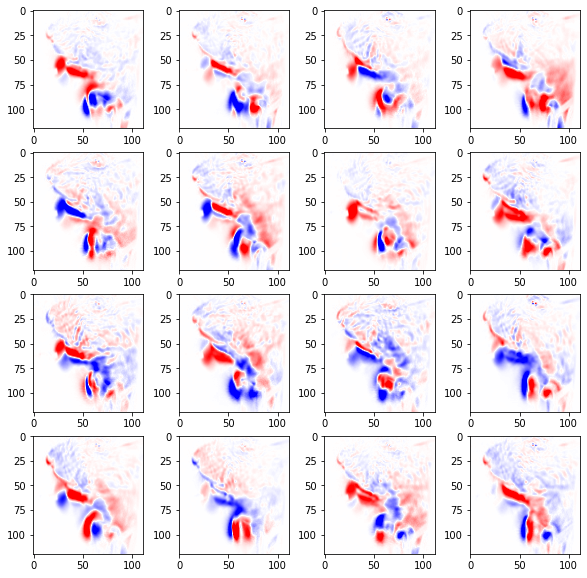

In [16]:
plt.subplots(4,4, figsize=(10,10))
for i in range(16):
    in_array = np.zeros(16, dtype=np.float32)
    in_array[i] = 1
    out = demo.m_panel.model.decoder(torch.from_numpy(in_array).view(1,1,-1)) 
    plt.subplot(4,4,i+1)
    plt.imshow(out.detach().numpy().squeeze(), vmin = -2, vmax = 2, cmap='bwr') 

637-AeLd-SC038_112319_s13--g5-side-node09-embed16-stim_both-lr5.0e-04-mu_l25.0e-03-2021-09-18


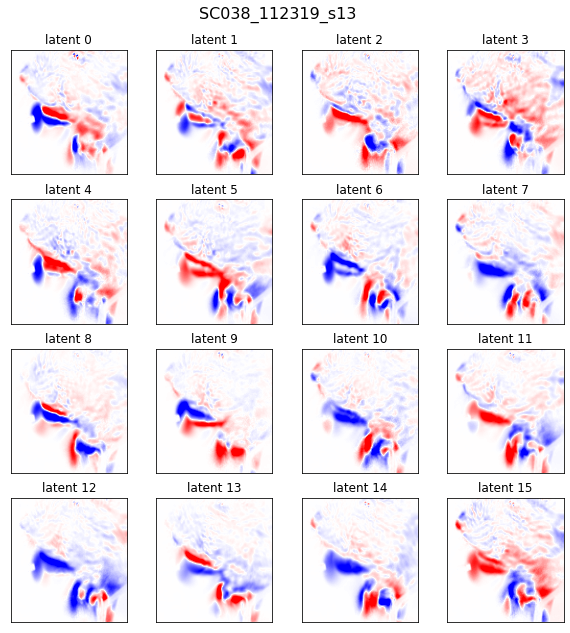

In [18]:
demo.load_model(sess = 'SC038_112319_s13') #sess='SC026_080519')

f,_ = plt.subplots(4,4, figsize=(10,10))
for i in range(16):
    in_array = np.zeros(16, dtype=np.float32)
    in_array[i] = 1
    out = demo.m_panel.model.decoder(torch.from_numpy(in_array).view(1,1,-1)) 
    plt.subplot(4,4,i+1)
    plt.title('latent %d'%i)
    plt.imshow(out.detach().numpy().squeeze(), vmin = -2, vmax = 2, cmap='bwr') 
    plt.xticks([])
    plt.yticks([])

f.suptitle('SC038_112319_s13', fontsize = 16)
f.subplots_adjust(top=0.92)
plt.savefig('/mnt/fs6/zwang71/figs/' + 'SC038_112319_s13_embedding_latents' + '.png', dpi=300, bbox_inches='tight')

In [19]:
session_folder = os.listdir('/mnt/fs6/zwang71/BehaviorVideo/log/train_log/SC/')
session_folder = [f.split('-')[2] for f in session_folder if 'SC' in f]
sessions = np.unique(session_folder)
sessions, len(sessions)

(array(['SC026_080519', 'SC026_080619', 'SC026_080819', 'SC027_072919',
        'SC027_073019', 'SC027_073119', 'SC027_080119', 'SC027_080319',
        'SC027_080419', 'SC030_100319', 'SC030_100419', 'SC030_100519',
        'SC031_102119', 'SC031_102319', 'SC032_121819', 'SC032_121919',
        'SC032_122019', 'SC033_111319', 'SC033_111419', 'SC033_111519',
        'SC035_010720', 'SC035_010820', 'SC035_010920', 'SC035_011020',
        'SC038_111919_s4', 'SC038_111919_s5', 'SC038_112019_s6',
        'SC038_112019_s7', 'SC038_112119_s8', 'SC038_112119_s9',
        'SC038_112219_s10', 'SC038_112219_s11', 'SC038_112319_s12',
        'SC038_112319_s13', 'SC043_092220', 'SC043_092320', 'SC043_092420',
        'SC043_092520', 'SC045_121020', 'SC045_121120', 'SC045_121420',
        'SC045_121720', 'SC045_121820', 'SC048_010121', 'SC048_010321',
        'SC048_010421', 'SC048_122520', 'SC048_122620', 'SC048_122920',
        'SC048_123020', 'SC048_123120', 'SC049_010721', 'SC049_010821',
      

In [20]:
session_latents = {}

for sess in sessions:
    demo.load_model(sess = sess)

    f,_ = plt.subplots(4,4, figsize=(10,10))
    session_latents[sess] = []

    for i in range(16):
        in_array = np.zeros(16, dtype=np.float32)
        in_array[i] = 1
        out = demo.m_panel.model.decoder(torch.from_numpy(in_array).view(1,1,-1)) 
        session_latents[sess].append(out.detach().numpy().squeeze())
        plt.subplot(4,4,i+1)
        plt.title('latent %d'%i)
        plt.imshow(out.detach().numpy().squeeze(), vmin = -2, vmax = 2, cmap='bwr') 
        plt.xticks([])
        plt.yticks([])

    f.suptitle(sess, fontsize = 16)
    f.subplots_adjust(top=0.92)
    plt.savefig('/mnt/fs6/zwang71/figs/' + sess+'_embedding_latents' + '.png', dpi=300, bbox_inches='tight')
    plt.close()


521-AeLd-SC026_080519--g0-side-node08-embed16-stim_both-lr5.0e-04-mu_l25.0e-03-2021-08-27
522-AeLd-SC026_080619--g1-side-node08-embed16-stim_both-lr5.0e-04-mu_l25.0e-03-2021-08-27
523-AeLd-SC026_080819--g2-side-node08-embed16-stim_both-lr5.0e-04-mu_l25.0e-03-2021-08-27
524-AeLd-SC027_072919--g3-side-node08-embed16-stim_both-lr5.0e-04-mu_l25.0e-03-2021-08-27
525-AeLd-SC027_073019--g4-side-node08-embed16-stim_both-lr5.0e-04-mu_l25.0e-03-2021-08-27
526-AeLd-SC027_073119--g4-side-node08-embed16-stim_both-lr5.0e-04-mu_l25.0e-03-2021-08-27
527-AeLd-SC027_080119--g3-side-node08-embed16-stim_both-lr5.0e-04-mu_l25.0e-03-2021-08-27
528-AeLd-SC027_080319--g2-side-node08-embed16-stim_both-lr5.0e-04-mu_l25.0e-03-2021-08-27
529-AeLd-SC027_080419--g1-side-node08-embed16-stim_both-lr5.0e-04-mu_l25.0e-03-2021-08-27
530-AeLd-SC030_100319--g0-side-node08-embed16-stim_both-lr5.0e-04-mu_l25.0e-03-2021-08-27
541-AeLd-SC030_100419--g3-side-node08-embed16-stim_both-lr5.0e-04-mu_l25.0e-03-2021-08-27
542-AeLd-S

In [ ]:
pickle.dump(session_latents, open('/mnt/fs6/zwang71/figs/session_latents.pkl', 'wb'))